In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

from miniad import Tensor
import miniad.functional as F

np.random.seed(123)
random.seed(123)

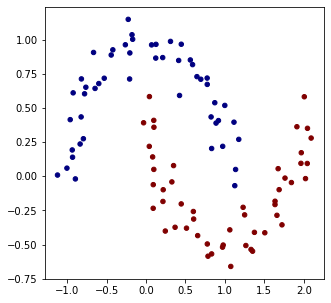

In [2]:
# make up a dataset
# Refer to https://github.com/karpathy/micrograd/blob/master/demo.ipynb
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

# visualize in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [3]:
class Model:
    def __init__(self, input_dim, hidden_dim):
        
        self.hidden_weight = Tensor(np.random.randn(input_dim, hidden_dim))
        self.hidden_bias = Tensor(np.random.randn(hidden_dim))
        
        self.project_weight = Tensor(np.random.randn(hidden_dim, 1))
        self.project_bias = Tensor(np.random.randn(1))
    
    def forward(self, x):
        x = F.linear(x, self.hidden_weight, self.hidden_bias)
        x = F.relu(x)
        x = F.linear(x, self.project_weight, self.project_bias)
        x = F.squeeze(x)
        x = F.sigmoid(x)
        
        return x
    
    def __call__(self, *args):
        return self.forward(*args)
    
    def parameters(self):
        return [self.hidden_weight, self.hidden_bias,
               self.project_weight, self.project_bias]
    
    def zero_grad(self):
        for parameter in self.parameters():
            parameter.grad = None


In [4]:
model = Model(2, 128)

In [5]:
# training
for k in range(40):
    Xy = np.concatenate([X, y.reshape(-1, 1)], 1)
    np.random.shuffle(Xy)
    X = Xy[:, :2]
    y = Xy[:, -1].reshape(-1)
    
    inputs = Tensor(X)
    outputs = model(inputs)
    loss = F.binary_cross_entropy_loss(outputs, y)
    
    accuracy = [(yi >= 0.5) == (yhati >= 0.5) for yi, yhati in zip(y, outputs.data)]
    acc = sum(accuracy) / len(accuracy)
    
    # backward
    model.zero_grad()
    loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    print("step {} loss {}, accuracy {}%".format(k, loss.data, acc*100))

step 0 loss 3.4601510500046313, accuracy 28.000000000000004%
step 1 loss 6.088194257399245, accuracy 72.0%
step 2 loss 3.563766097836341, accuracy 81.0%
step 3 loss 2.1279805175783277, accuracy 83.0%
step 4 loss 1.3165589597013068, accuracy 88.0%
step 5 loss 0.9956155266847213, accuracy 88.0%
step 6 loss 0.7865346050961867, accuracy 89.0%
step 7 loss 0.6377522819061003, accuracy 90.0%
step 8 loss 0.5303888542447999, accuracy 91.0%
step 9 loss 0.46131962802118437, accuracy 90.0%
step 10 loss 0.42251894771446574, accuracy 90.0%
step 11 loss 0.40946146725620136, accuracy 92.0%
step 12 loss 0.39661770283974834, accuracy 91.0%
step 13 loss 0.44100634652406046, accuracy 93.0%
step 14 loss 0.4369221330987767, accuracy 90.0%
step 15 loss 0.4907624827753422, accuracy 91.0%
step 16 loss 0.4809280688963969, accuracy 89.0%
step 17 loss 0.5267108971092034, accuracy 92.0%
step 18 loss 0.43200415782964446, accuracy 91.0%
step 19 loss 0.4361605043615576, accuracy 93.0%
step 20 loss 0.3053979898682439,